# Music Classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn

In [ ]:
audio_path = '/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/rock/rock.00000.wav'
sig , sample_rate = librosa.load('./archive/Data/genres_original/rock/rock.00000.wav')
# sig

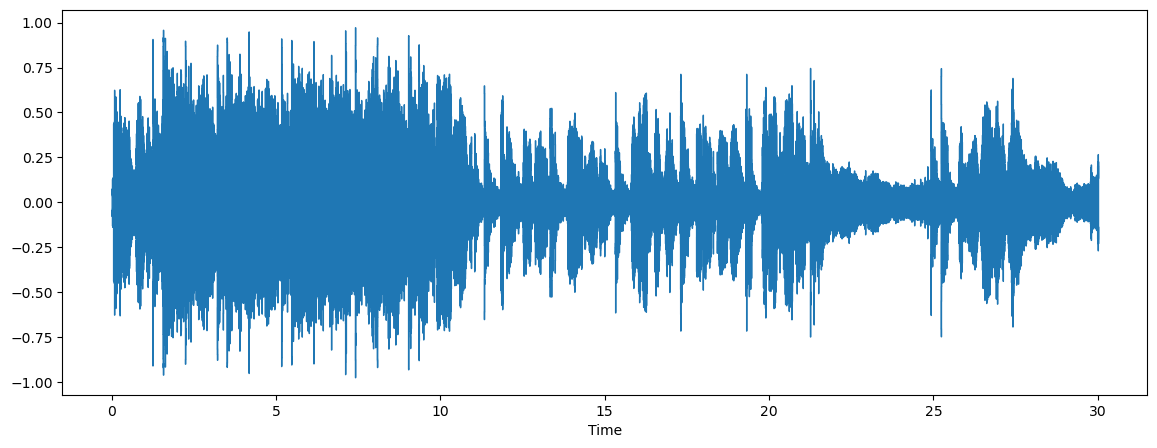

In [3]:

plt.figure(figsize=(14, 5))
librosa.display.waveshow(sig, sr=sample_rate)


In [4]:
ipd.Audio(filename=audio_path,rate=44100,autoplay=True)


because all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one


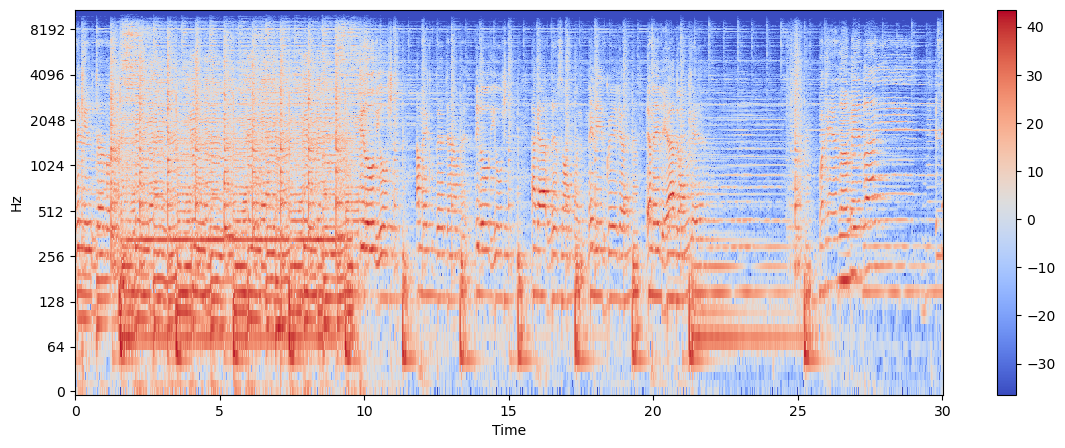

In [5]:
print('because all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one')
X = librosa.stft(sig)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()


### computing features and creating the data

In [6]:
# import os
# j=0
# nparr= []
# column_values=[]
# df = pd.DataFrame()
# music_path ='/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/'


# for dirpath, dnames, fnames in os.walk(music_path):

# #     for f in fnames:
# #     print( fnames,sep='\n**\n')

#     if(dirpath.endswith(('rock','metal','hiphop'))):
#         if(dirpath.endswith('rock')):
#             target=0
#         elif dirpath.endswith('metal'):
#             target=1
#         elif dirpath.endswith('hiphop'):
#             target=2
            
#         for fname in fnames:
#             x , sr = librosa.load(os.path.join(dirpath,fname))
#             mfccs = librosa.feature.mfcc(y=x, n_mfcc=20, sr=sample_rate)

#             data={
#                     'index':j,
#                     'song':fname,
#                     'spectral_centroid_mean':np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)),
#                     'spectral_centroid_var':np.var(librosa.feature.spectral_centroid(y=x, sr=sr)),
#                     'spectral_bandwidth_mean':np.mean(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
#                     'spectral_bandwidth_var':np.var(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
#                     'spectral_contrast_mean':np.mean(librosa.feature.spectral_contrast(y=x, sr=sr)),
#                     'spectral_contrast_var':np.var(librosa.feature.spectral_contrast(y=x, sr=sr)),
#                     'spectral_flatness__mean':np.mean(librosa.feature.spectral_flatness(y=x)),
#                     'spectral_flatness__var':np.var(librosa.feature.spectral_flatness(y=x)),
#                     'spectral_rolloff__mean':np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr)),
#                     'spectral_rolloff__var':np.var(librosa.feature.spectral_rolloff(y=x, sr=sr)),
#                     'poly_features_mean':np.mean(librosa.feature.poly_features(y=x, sr=sr)),
#                     'poly_features_var':np.var(librosa.feature.poly_features(y=x, sr=sr)),
#                     'tonnetz_mean':np.mean(librosa.feature.tonnetz(y=x, sr=sr)),
#                     'tonnetz_var':np.var(librosa.feature.tonnetz(y=x, sr=sr)),
#                     'zero_crossing_rate_mean':np.mean(librosa.feature.zero_crossing_rate(y=x, )),
#                     'zero_crossing_rate_var':np.var(librosa.feature.zero_crossing_rate(y=x,)),
#                     'chroma_stft_mean':np.mean(librosa.feature.chroma_stft(y=x, sr=sr)),
#                     'chroma_stft_var':np.var(librosa.feature.chroma_stft(y=x, sr=sr)),
#                     'chroma_cens_mean':np.mean(librosa.feature.chroma_cens(y=x, sr=sr)),
#                     'chroma_cens_var':np.var(librosa.feature.chroma_cens(y=x, sr=sr)),
#                     'harmonic_mean':np.mean(librosa.effects.harmonic(y=x)[0]),
#                     'rms_mean':np.mean(librosa.feature.rms(y=x, )),
#                     'rms_var':np.var(librosa.feature.rms(y=x,)),
#                     'tempogram_mean':np.mean(librosa.feature.tempogram(y=x, sr=sr)),
#                     'tempogram_var':np.var(librosa.feature.tempogram(y=x, sr=sr)),
#                     'percussive_mean':np.mean(librosa.effects.harmonic(y=x)[1]),
#                     'target':target
#             }
#             for i,mf in enumerate(mfccs):
#                 data[f'mfcc{i+1}_mean']=np.mean(mf)
#                 data[f'mfcc{i+1}_var']=np.var(mf)
#             if(j==0):
#                 col_name=list(data.keys())
#                 print(col_name)
# #             data.values
#             nparr.append(list(data.values()))
#             print(j)
#             j+=1
            


# # df = pd.DataFrame(data=nparr,index=range(0,len(fnames)))
# # df=pd.concat([df,new_df], axis=0)
# print("DONE!")


In [7]:
# df = pd.DataFrame(data =  np.array(nparr), 
#                   index = range(len(nparr)), 
#                   columns = col_name)
# df

In [8]:

# df=df.loc[:, ~df.columns.isin(['index','Unnamed: 0'])]

# df.to_csv('./rock_metal_hiphop_features.csv', sep='\t', encoding='utf-8')
# df.to_csv('./tes.csv', sep='\t', encoding='utf-8')


In [9]:
df=pd.read_csv('./rock_metal_hiphop_features.csv',sep='\t')
df=df.loc[:, ~df.columns.isin(['index','Unnamed: 0'])]


df.columns.values

array(['song', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var',
       'spectral_contrast_mean', 'spectral_contrast_var',
       'spectral_flatness__mean', 'spectral_flatness__var',
       'spectral_rolloff__mean', 'spectral_rolloff__var',
       'poly_features_mean', 'poly_features_var', 'tonnetz_mean',
       'tonnetz_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'chroma_stft_mean', 'chroma_stft_var', 'chroma_cens_mean',
       'chroma_cens_var', 'harmonic_mean', 'rms_mean', 'rms_var',
       'tempogram_mean', 'tempogram_var', 'percussive_mean', 'target',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean',
       'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
   

In [10]:
df.describe()

,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,spectral_rolloff__var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2456.521734,4.695874e+05,2339.655365,126453.792542,19.893909,68.354130,0.023105,0.001484,5042.819527,1.705739e+06,...,2.966388,46.948797,-5.735868,49.752613,1.521807,49.383125,-3.462543,49.328482,-0.376592,48.884205
std,471.643980,3.921865e+05,329.570118,105801.129058,1.694480,33.044956,0.021405,0.004811,941.659142,1.474540e+06,...,4.103336,18.368030,3.857086,24.309889,3.665959,24.463749,3.687162,25.582465,3.651060,26.956671
min,1181.326607,4.375263e+04,1568.952472,11146.734295,14.980182,10.217592,0.001295,0.000002,2367.345030,1.019584e+05,...,-8.830944,17.181950,-15.060139,17.213970,-7.839728,15.401896,-16.089869,15.399676,-9.290357,16.508140
25%,2185.336498,2.091991e+05,2119.849780,56753.859777,18.561067,29.417486,0.009414,0.000083,4487.938788,7.184810e+05,...,0.180581,33.888676,-8.229088,33.572751,-1.226001,33.185130,-5.688419,32.811611,-2.947071,32.061886
50%,2465.922146,3.291026e+05,2285.909876,94672.242014,20.201422,80.571734,0.014901,0.000218,5084.542160,1.226628e+06,...,3.358163,42.846941,-5.954820,43.960746,1.617335,43.095665,-3.422476,42.398731,-0.559377,41.787378
75%,2754.231498,6.050812e+05,2503.658440,159528.951663,20.941253,94.001370,0.031328,0.001520,5575.280195,2.152654e+06,...,5.632109,56.093623,-2.670734,59.063678,4.185276,58.269860,-1.405569,58.678999,1.874899,56.828310
max,3785.438540,2.099110e+06,3321.339011,694624.872941,24.347189,130.080718,0.118393,0.075744,7659.958219,8.308336e+06,...,12.837337,130.295060,3.713944,199.191160,12.992372,181.608100,14.645563,202.433170,15.361668,225.664930


### Scatter 6  features 

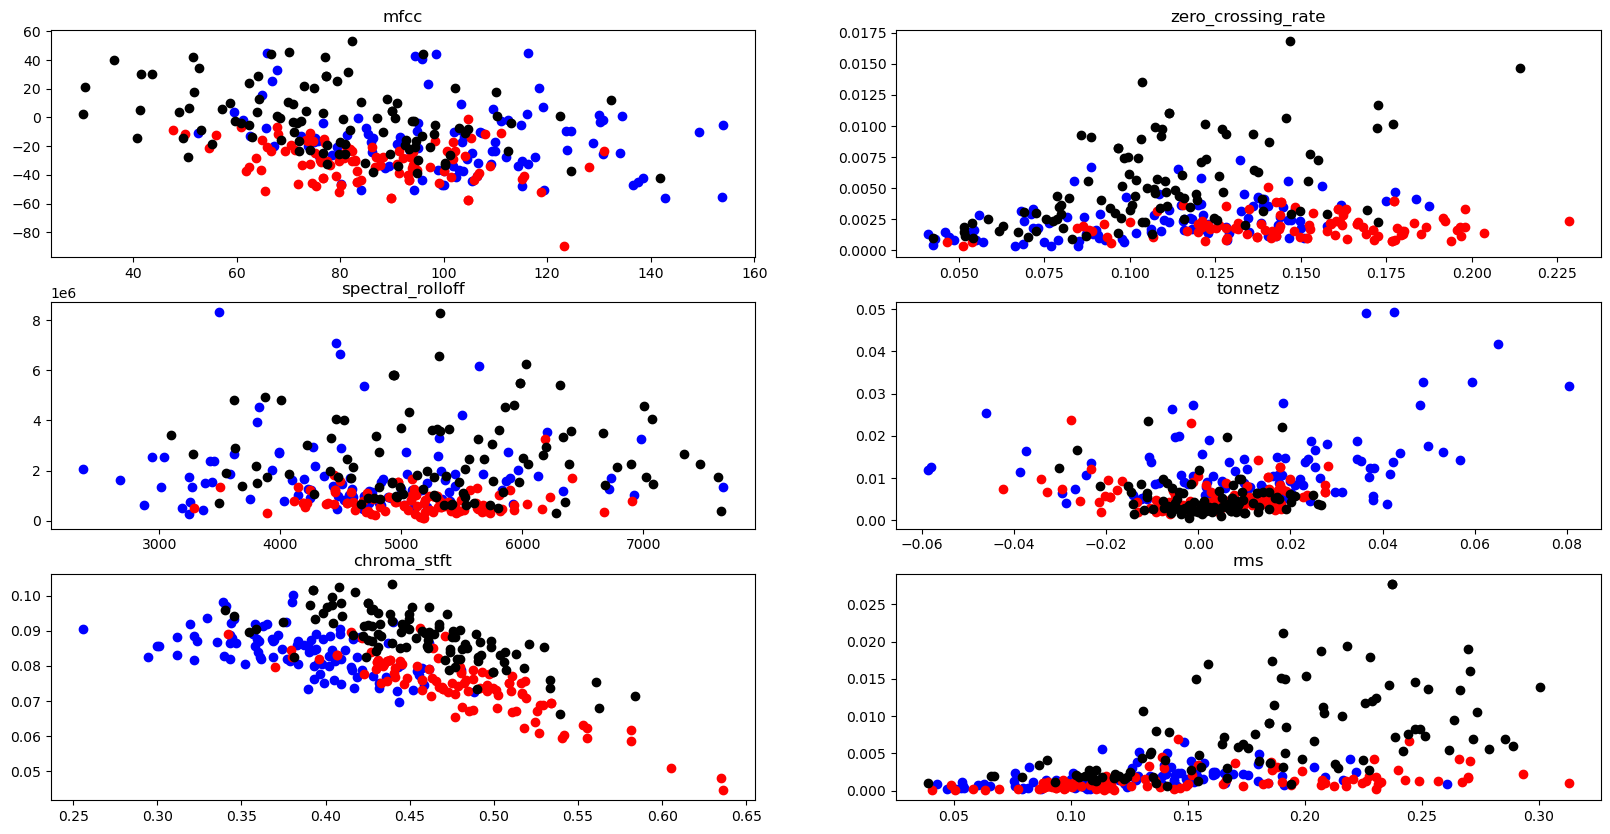

In [11]:
rock=df[df.target==0]
metal=df[df.target==1]
hiphop=df[df.target==2]

rock.shape

fig, ax = plt.subplots(3, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax[0, 0].scatter(rock.mfcc2_mean, rock.mfcc3_mean,  color='blue') #row=0, col=0
ax[0, 0].scatter(metal.mfcc2_mean, metal.mfcc3_mean,  color='red') #row=0, col=0
ax[0, 0].scatter(hiphop.mfcc2_mean, hiphop.mfcc3_mean,  color='black') 
ax[0, 0].set_title("mfcc")

ax[0, 1].scatter(rock.zero_crossing_rate_mean, rock.zero_crossing_rate_var,  color='blue') #row=0, col=0
ax[0, 1].scatter(metal.zero_crossing_rate_mean, metal.zero_crossing_rate_var,  color='red') #row=0, col=0
ax[0, 1].scatter(hiphop.zero_crossing_rate_mean, hiphop.zero_crossing_rate_var,  color='black') 
ax[0, 1].set_title("zero_crossing_rate")

ax[1, 0].scatter(rock.spectral_rolloff__mean,rock.spectral_rolloff__var,  color='blue') #row=0, col=0
ax[1, 0].scatter(metal.spectral_rolloff__mean,metal.spectral_rolloff__var,  color='red') #row=0, col=0
ax[1, 0].scatter(hiphop.spectral_rolloff__mean,hiphop.spectral_rolloff__var,  color='black')
ax[1, 0].set_title("spectral_rolloff")

ax[1, 1].scatter(rock.tonnetz_mean, (rock.tonnetz_var),  color='blue') #row=0, col=0
ax[1, 1].scatter(metal.tonnetz_mean,(metal.tonnetz_var),  color='red') #row=0, col=0
ax[1, 1].scatter(hiphop.tonnetz_mean,(hiphop.tonnetz_var),  color='black')
ax[1, 1].set_title("tonnetz")

ax[2, 1].scatter(rock.rms_mean, (rock.rms_var),  color='blue') #row=0, col=0
ax[2, 1].scatter(metal.rms_mean,(metal.rms_var),  color='red') #row=0, col=0
ax[2, 1].scatter(hiphop.rms_mean,(hiphop.rms_var),  color='black') 
ax[2, 1].set_title("rms")

ax[2, 0].scatter(rock.chroma_stft_mean, (rock.chroma_stft_var),  color='blue') #row=0, col=0
ax[2, 0].scatter(metal.chroma_stft_mean,(metal.chroma_stft_var),  color='red') #row=0, col=0
ax[2, 0].scatter(hiphop.chroma_stft_mean,(hiphop.chroma_stft_var),  color='black') 
ax[2, 0].set_title("chroma_stft")

# ax[0, 0].scatter(metal.mfcc1_mean, metal.target,  color='red') #row=0, col=0
# print('hi')

# ax[1, 0].scatter(df.tscore, df.sal,  color='blue') #row=1, col=0
# ax[0, 1].scatter(df.iscore, df.sal,  color='blue')#row=0, col=1
plt.show()
# metal.mfcc1_mean
# type(metal.mfcc1_mean)


In [12]:
# mfccs = librosa.feature.mfcc(y=sig, n_mfcc=20, sr=sample_rate)
# delta=librosa.feature.delta(mfccs)
# print(delta[0])
# np.var(mfccs[1])
sdf=df.loc[:, ~df.columns.isin(['tempogram_mean','tempogram_var','harmonic_var'])]
sdf=sdf[['mfcc2_mean','tonnetz_var','chroma_stft_mean','rms_var','spectral_rolloff__var','zero_crossing_rate_var']]
sdf.shape

(300, 6)

### Normalize data

In [13]:
from sklearn import preprocessing
X=sdf.loc[:, ~sdf.columns.isin(['target', 'song'])]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X.shape
# ff=pd.DataFrame(data)
# ff

(300, 6)

### Test and Train

In [14]:
from sklearn.model_selection import train_test_split
y=df.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (240, 6) (240,)
Test set: (60, 6) (60,)


### Training

Let's start the algorithm with k=4 for now:


In [15]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10, weights='distance')

### Predicting

We can use the model to make predictions on the test set:


In [16]:
yhat = neigh.predict(X_test)
yhat

array([1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2])

### Accuracy evaluation

<!-- In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.
 -->

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.f1_score(y_train, neigh.predict(X_train),average='weighted'))
print("Test set Accuracy: ", metrics.f1_score(y_test, yhat,average='weighted'))

Train set Accuracy:  0.9958333333333333
Test set Accuracy:  0.8350000000000002


### Finding optimal  K

In [18]:
prev_accur=0
prev_k=0
for k in range(1,30):
#Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    accur=metrics.f1_score(y_test, yhat,average='weighted')
    if accur > prev_accur:
        prev_accur=accur
        prev_k=k
#     print('K:',k,"Train set Accuracy: ", accur)
    
print('K:',prev_k,"  Test set Accuracy: ", prev_accur)

K: 10   Test set Accuracy:  0.8350000000000002


### Forward Selection

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# df.iloc[:,0]
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]

for_sel_colname=[]
for_sel_val=0

for i in range(5):
    tmp=[]
    for col_name in dff:
        if col_name not in for_sel_colname:
#             print(col_name,for_sel_colname,col_name not in for_sel_colname)
            data=dff[[*for_sel_colname,col_name]]
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2,random_state=4)
            k = 10
            #Train Model and Predict  
            kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
            yhat = kneigh.predict(X_test)
#             accur=metrics.accuracy_score(y_test, yhat)
            accur=metrics.f1_score(y_test, yhat, average='weighted')
            tmp.append([col_name,accur])
    max_tmp=max(tmp, key=lambda x: x[1])
    for_sel_colname.append(max_tmp[0])
    for_sel_val=max_tmp[1]
    print(for_sel_colname,for_sel_val)




['spectral_contrast_var'] 0.7281342531342532
['spectral_contrast_var', 'chroma_stft_var'] 0.8515806424273243
['spectral_contrast_var', 'chroma_stft_var', 'mfcc8_var'] 0.9005646344018438
['spectral_contrast_var', 'chroma_stft_var', 'mfcc8_var', 'mfcc5_var'] 0.9159492447637655
['spectral_contrast_var', 'chroma_stft_var', 'mfcc8_var', 'mfcc5_var', 'mfcc11_mean'] 0.95


### Find the optimal number of features with forward selection

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# df.iloc[:,0]
# df = df.sample(frac=1, random_state=1).reset_index()

dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]
knee_point={"features":[],"accur":0}
# check_first_loop=True
for_sel_colname=[]
for_sel_val=0
featurNumber_accur={"featureNumber":[],"accur":[]}

for i,v in enumerate(df):
    tmp=[]
    
    for col_name in dff:
        if col_name not in for_sel_colname:
            data=dff[[*for_sel_colname,col_name]]
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.25,random_state=4)
            k = 10
            #Train Model and Predict  
            kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
            yhat = kneigh.predict(X_test)
            accur=metrics.f1_score(y_test, yhat, average='weighted')
            tmp.append([col_name,accur])

    if len(tmp)!= 0:
        
        max_tmp=max(tmp, key=lambda x: x[1])
        
        for_sel_colname.append(max_tmp[0])
        for_sel_val=max_tmp[1]
        featurNumber_accur["featureNumber"].append(i+1)
        featurNumber_accur["accur"].append(for_sel_val)
        
        if max_tmp[1] > knee_point["accur"] :
#             print('max_tmp[1]',max_tmp[1],'knee_point["accur"]',knee_point["accur"],len(for_sel_colname))
            check_first_loop = False
            knee_point["accur"]=max_tmp[1]
            knee_point["features"]=[*for_sel_colname]

knee_point

{'features': ['spectral_contrast_var',
  'chroma_stft_var',
  'mfcc8_var',
  'mfcc5_var',
  'mfcc11_mean',
  'tonnetz_var',
  'spectral_centroid_var',
  'spectral_bandwidth_var',
  'spectral_flatness__var',
  'spectral_rolloff__var',
  'mfcc8_mean'],
 'accur': 0.9603026004728134}

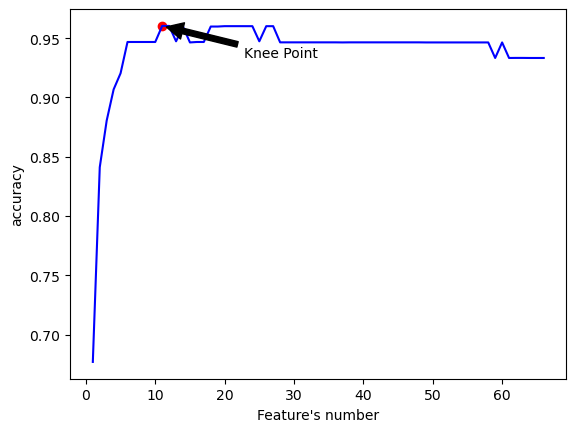

In [21]:
plt.plot(featurNumber_accur["featureNumber"],featurNumber_accur["accur"],  color='blue')
plt.scatter(len(knee_point['features']), knee_point['accur'],  color='red')
plt.annotate('Knee Point',  (len(knee_point['features']), knee_point['accur']),
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
plt.xlabel("Feature's number")
plt.ylabel("accuracy")
plt.show()

In [22]:
print(f"""Optimum Features Count : {len(knee_point['features'])} 
Features : {knee_point['features']} 
Test Accuracy : {knee_point['accur']} 
      """)

Optimum Features Count : 11 
Features : ['spectral_contrast_var', 'chroma_stft_var', 'mfcc8_var', 'mfcc5_var', 'mfcc11_mean', 'tonnetz_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'spectral_flatness__var', 'spectral_rolloff__var', 'mfcc8_mean'] 
Test Accuracy : 0.9603026004728134 
      


### Backward elimination

In [23]:
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]


while len(dff.columns.to_list())>=6:
    for col_name in dff:

        data=dff.loc[:, dff.columns != col_name] #Exclude col_name column
        
        norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
        X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.25, random_state=4)
        k = 10
        #Train Model and Predict  
        kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
        yhat = kneigh.predict(X_test)

        accur=metrics.f1_score(y_test, yhat, average='weighted')
        tmp.append([col_name,accur])
    max_tmp=max(tmp, key=lambda x: x[1])    
    dff=dff.drop(columns=(max_tmp[0]))
    tmp=[]

print(accur)
print(dff)

0.8669128205128205
     chroma_stft_mean  tempogram_var   mfcc5_var  mfcc12_mean  mfcc19_mean
0            0.409810       0.019161  260.992600    -0.377945    -3.022599
1            0.447078       0.030482  202.377240     4.470121    -2.191383
2            0.489504       0.029618  276.829220     3.913655    -2.099161
3            0.404245       0.026938  344.289700     7.048088    -2.425388
4            0.479746       0.032484  295.498200    14.893810     1.254600
..                ...            ...         ...          ...          ...
295          0.519075       0.053115   87.517390    14.613810    -4.396084
296          0.469764       0.051846   77.054010     9.866014   -10.603471
297          0.480443       0.047340  101.010735    15.403562     0.990668
298          0.499249       0.059649   91.362495    18.040703    -6.511414
299          0.462438       0.041581   80.127220     8.926949     0.981358

[300 rows x 5 columns]


### Find the optimal number of features with Backward elimination

In [24]:
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]
featurNumber_accur={"featureNumber":[],"accur":[]}
knee_point={"features":[],"accur":0}


while( len_dff := len(dff.columns.values))>1:
    for col_name in dff:

        data=dff.loc[:, dff.columns != col_name] #Exclude col_name column

        if(len(data.columns.values)>0):
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.25, random_state=4)
            k = 10
            #Train Model and Predict  
            kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
            yhat = kneigh.predict(X_test)

            accur=metrics.f1_score(y_test, yhat, average='weighted')
            tmp.append([col_name,accur])

    max_tmp=max(tmp, key=lambda x: x[1])    
    
    featurNumber_accur["featureNumber"].append(len_dff)
    featurNumber_accur["accur"].append(max_tmp[1])

    if max_tmp[1] >= knee_point["accur"] :
        knee_point["accur"]=max_tmp[1]
        knee_point["features"]=dff.columns.values

    dff=dff.drop(columns=(max_tmp[0]))
    tmp=[]

# print(accur)
print("done")

done


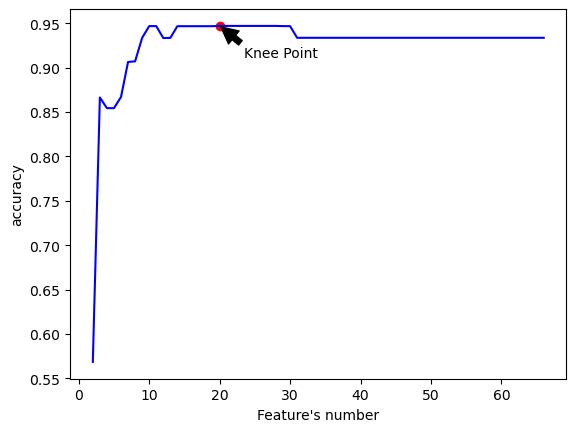

In [25]:
featurNumber_accur
plt.plot(featurNumber_accur["featureNumber"],featurNumber_accur["accur"],  color='blue')
plt.scatter(len(knee_point['features']), knee_point['accur'],  color='red')
plt.annotate('Knee Point',  (len(knee_point['features']), knee_point['accur']),
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
plt.xlabel("Feature's number")
plt.ylabel("accuracy")
plt.show()

In [26]:
print(f"""Optimum Features Count : {len(knee_point['features'])} 
Features : {knee_point['features']} 
Test Accuracy : {knee_point['accur']} 
      """)

Optimum Features Count : 20 
Features : ['poly_features_var' 'chroma_stft_mean' 'tempogram_var' 'percussive_mean'
 'mfcc5_var' 'mfcc10_var' 'mfcc12_mean' 'mfcc13_mean' 'mfcc13_var'
 'mfcc14_var' 'mfcc15_mean' 'mfcc16_var' 'mfcc17_mean' 'mfcc17_var'
 'mfcc18_mean' 'mfcc18_var' 'mfcc19_mean' 'mfcc19_var' 'mfcc20_mean'
 'mfcc20_var'] 
Test Accuracy : 0.9469692671394799 
      


In [27]:
# data=dff
# y=df.target

#         #     print(data)
# norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
# X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
# k = 20

# #Train Model and Predict  
# kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
# yhat = kneigh.predict(X_test)
# accur=metrics.accuracy_score(y_test, yhat)
# accur

#  SVM music classification 

In [28]:
df=pd.read_csv('./rock_metal_hiphop_features.csv',sep='\t')
df=df.loc[:, ~df.columns.isin(['index','Unnamed: 0'])]

# df = pd.read_csv('data.csv', index_col=0)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# df=df.drop(columns=['0'])
# print(df)
df

,song,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,hiphop.00066.wav,2245.067619,753618.645122,2484.093161,168087.835501,17.984612,27.161862,0.028573,0.001660,4816.043268,...,-3.190697,52.027626,-3.702309,47.352280,-3.995493,36.549446,-3.022599,43.997870,-2.458823,42.224610
1,hiphop.00054.wav,3258.307248,837471.380173,3321.339011,113648.581515,17.493492,32.900860,0.060354,0.003978,7619.448152,...,-1.518457,37.893750,-2.563426,35.954407,-1.191898,27.880480,-2.191383,28.278633,-1.878326,33.312927
2,hiphop.00069.wav,3297.902925,997595.933993,3138.949019,86377.970752,18.173710,34.173405,0.046457,0.002810,7079.552628,...,1.474427,37.625220,-0.693060,36.275930,-3.158557,31.722725,-2.099161,29.215261,-2.376526,36.156567
3,hiphop.00002.wav,1490.683576,633571.697355,1910.490629,233566.166116,20.495059,65.187038,0.003068,0.000037,3095.094020,...,1.260992,54.927567,-6.967104,61.715100,0.392866,41.187510,-2.425388,41.670590,-2.932968,38.800964
4,hiphop.00086.wav,2083.438901,443318.549732,2198.235480,108959.313838,20.126409,73.007279,0.006671,0.000100,4479.439168,...,8.286410,56.302750,-0.585543,61.782100,-1.616229,63.707428,1.254600,46.011700,3.045684,57.570210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,metal.00036.wav,2685.678093,177717.705033,2317.579770,34559.713786,19.875531,105.847683,0.020452,0.000162,5331.258044,...,8.087853,41.508488,-7.460728,26.306587,5.422094,33.293130,-4.396084,32.895600,3.044864,32.449078
296,metal.00065.wav,2760.046330,214048.128454,2242.641756,76983.352390,20.980286,86.071234,0.020054,0.000165,5259.580622,...,4.872102,35.932460,-11.783129,49.324863,1.661150,37.710890,-10.603471,38.996260,-3.778469,36.187263
297,metal.00033.wav,2030.487916,323534.852056,1929.862421,87748.021977,20.662738,92.377865,0.007699,0.000371,4224.296524,...,-1.671906,64.010020,-0.343230,72.082690,-7.770620,59.801884,0.990668,52.720345,-4.180941,21.496191
298,metal.00055.wav,3108.521764,107565.633525,2361.478699,46553.981648,20.293606,106.984562,0.035110,0.001881,5699.254323,...,9.268199,37.411343,-7.142877,30.024181,4.654262,35.386040,-6.511414,44.347664,7.862762,33.422104


### Train and test

In [29]:
sdf=df.loc[:, ~df.columns.isin(['tempogram_mean','tempogram_var','harmonic_var'])]
sdf=sdf[['mfcc2_mean','tonnetz_var','chroma_stft_mean','rms_var','spectral_rolloff__var','zero_crossing_rate_var']]
sdf.shape
X=sdf.loc[:, ~sdf.columns.isin(['target', 'song'])]

y=df['target']
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# X.shape


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (225, 6) (225,)
Test set: (75, 6) (75,)


In [30]:
from sklearn import svm

# kernels=['linear', 'poly', 'rbf', 'sigmoid']
# clf = svm.SVC(kernel=kernels[0])
# clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)
# f1=metrics.f1_score(y_test, yhat, average='weighted')
# print(kernels[0],f1)

# clf = svm.SVC(kernel=kernels[1])
# clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)
# f1=metrics.f1_score(y_test, yhat, average='weighted')
# print(kernels[1],f1)

# clf = svm.SVC(kernel=kernels[2])
# clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)
# f1=metrics.f1_score(y_test, yhat, average='weighted')
# print(kernels[2],f1)

# clf = svm.SVC(kernel=kernels[3])
# clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)
# f1=metrics.f1_score(y_test, yhat, average='weighted')
# print(kernels[3],f1)


# kernels=['linear', 'poly', 'rbf', 'sigmoid']
# for k in kernels:
#     clf = svm.SVC(kernel=k)
#     clf.fit(X_train, y_train)
#     yhat = clf.predict(X_test)
#     f1=metrics.f1_score(y_test, yhat, average='weighted')
#     print(k,f1)
# clf = svm.SVC(kernel='rbf')
# clf.fit(X_train, y_train)
# yhat = clf.predict(X_test)
# f1score=metrics.f1_score(y_test, yhat, average='weighted')
# print('rbf',f1_score)

In [31]:
df

,song,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,spectral_contrast_mean,spectral_contrast_var,spectral_flatness__mean,spectral_flatness__var,spectral_rolloff__mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,hiphop.00066.wav,2245.067619,753618.645122,2484.093161,168087.835501,17.984612,27.161862,0.028573,0.001660,4816.043268,...,-3.190697,52.027626,-3.702309,47.352280,-3.995493,36.549446,-3.022599,43.997870,-2.458823,42.224610
1,hiphop.00054.wav,3258.307248,837471.380173,3321.339011,113648.581515,17.493492,32.900860,0.060354,0.003978,7619.448152,...,-1.518457,37.893750,-2.563426,35.954407,-1.191898,27.880480,-2.191383,28.278633,-1.878326,33.312927
2,hiphop.00069.wav,3297.902925,997595.933993,3138.949019,86377.970752,18.173710,34.173405,0.046457,0.002810,7079.552628,...,1.474427,37.625220,-0.693060,36.275930,-3.158557,31.722725,-2.099161,29.215261,-2.376526,36.156567
3,hiphop.00002.wav,1490.683576,633571.697355,1910.490629,233566.166116,20.495059,65.187038,0.003068,0.000037,3095.094020,...,1.260992,54.927567,-6.967104,61.715100,0.392866,41.187510,-2.425388,41.670590,-2.932968,38.800964
4,hiphop.00086.wav,2083.438901,443318.549732,2198.235480,108959.313838,20.126409,73.007279,0.006671,0.000100,4479.439168,...,8.286410,56.302750,-0.585543,61.782100,-1.616229,63.707428,1.254600,46.011700,3.045684,57.570210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,metal.00036.wav,2685.678093,177717.705033,2317.579770,34559.713786,19.875531,105.847683,0.020452,0.000162,5331.258044,...,8.087853,41.508488,-7.460728,26.306587,5.422094,33.293130,-4.396084,32.895600,3.044864,32.449078
296,metal.00065.wav,2760.046330,214048.128454,2242.641756,76983.352390,20.980286,86.071234,0.020054,0.000165,5259.580622,...,4.872102,35.932460,-11.783129,49.324863,1.661150,37.710890,-10.603471,38.996260,-3.778469,36.187263
297,metal.00033.wav,2030.487916,323534.852056,1929.862421,87748.021977,20.662738,92.377865,0.007699,0.000371,4224.296524,...,-1.671906,64.010020,-0.343230,72.082690,-7.770620,59.801884,0.990668,52.720345,-4.180941,21.496191
298,metal.00055.wav,3108.521764,107565.633525,2361.478699,46553.981648,20.293606,106.984562,0.035110,0.001881,5699.254323,...,9.268199,37.411343,-7.142877,30.024181,4.654262,35.386040,-6.511414,44.347664,7.862762,33.422104


### Optimum Forward Selection for SVM

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# df.iloc[:,0]
# df = df.sample(frac=1, random_state=1).reset_index()

dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]
knee_point={"features":[],"accur":0}
# check_first_loop=True
for_sel_colname=[]
for_sel_val=0
featurNumber_accur={"featureNumber":[],"accur":[]}
clf=svm.SVC(kernel='linear')

for i,v in enumerate(df):
    tmp=[]
    for col_name in dff:
        if col_name not in for_sel_colname:
#             print(col_name,for_sel_colname,col_name not in for_sel_colname)
            data=dff[[*for_sel_colname,col_name]]
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.25,random_state=4)
            clf.fit(X_train, y_train)
#             kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
            yhat = clf.predict(X_test)
            accur=metrics.f1_score(y_test, yhat, average='weighted')
#             accur=metrics.accuracy_score(y_test, yhat)
            tmp.append([col_name,accur])
#     print("i",i,"  len(tmp)**",len(tmp))
    if len(tmp)!= 0:
        
        max_tmp=max(tmp, key=lambda x: x[1])
        
        for_sel_colname.append(max_tmp[0])
        for_sel_val=max_tmp[1]
        featurNumber_accur["featureNumber"].append(i+1)
        featurNumber_accur["accur"].append(for_sel_val)
        print('for_sel_val',for_sel_val,len(for_sel_colname))
        
        if max_tmp[1] > knee_point["accur"] :
            print('max_tmp[1]',max_tmp[1],'knee_point["accur"]',knee_point["accur"])
            check_first_loop = False
            knee_point["accur"]=max_tmp[1]
            knee_point["features"]=[*for_sel_colname]
#         [T,len(for_sel_colname)]
#         print(for_sel_colname,for_sel_val)

# print(featurNumber_accur)
# print("*")
# print(for_sel_colname,for_sel_val)

# plt.scatter(featurNumber_accur,  color='blue')
# plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
knee_point

for_sel_val 0.6254890788224122 1
max_tmp[1] 0.6254890788224122 knee_point["accur"] 0
for_sel_val 0.7999267399267399 2
max_tmp[1] 0.7999267399267399 knee_point["accur"] 0.6254890788224122
for_sel_val 0.8270976430976431 3
max_tmp[1] 0.8270976430976431 knee_point["accur"] 0.7999267399267399
for_sel_val 0.8794920634920635 4
max_tmp[1] 0.8794920634920635 knee_point["accur"] 0.8270976430976431
for_sel_val 0.8934670008354219 5
max_tmp[1] 0.8934670008354219 knee_point["accur"] 0.8794920634920635
for_sel_val 0.9074602916463381 6
max_tmp[1] 0.9074602916463381 knee_point["accur"] 0.8934670008354219
for_sel_val 0.9074602916463381 7
for_sel_val 0.9074602916463381 8
for_sel_val 0.9074602916463381 9
for_sel_val 0.9074602916463381 10
for_sel_val 0.9201426024955437 11
max_tmp[1] 0.9201426024955437 knee_point["accur"] 0.9074602916463381
for_sel_val 0.9325030249253852 12
max_tmp[1] 0.9325030249253852 knee_point["accur"] 0.9201426024955437
for_sel_val 0.920149093053324 13
for_sel_val 0.9339130434782609 14

{'features': ['mfcc4_var',
  'mfcc4_mean',
  'mfcc3_mean',
  'mfcc12_mean',
  'mfcc3_var',
  'mfcc5_var',
  'mfcc16_var',
  'harmonic_mean',
  'mfcc7_var',
  'mfcc15_var',
  'poly_features_var',
  'rms_var',
  'mfcc13_mean',
  'mfcc19_var',
  'poly_features_mean',
  'spectral_flatness__var',
  'mfcc10_mean',
  'spectral_bandwidth_var',
  'zero_crossing_rate_var',
  'mfcc14_var',
  'mfcc8_mean',
  'mfcc1_var',
  'spectral_centroid_var',
  'rms_mean',
  'mfcc6_mean',
  'mfcc17_var',
  'tonnetz_mean',
  'chroma_cens_mean',
  'mfcc18_var',
  'mfcc6_var',
  'mfcc20_var',
  'tempogram_var',
  'chroma_cens_var',
  'mfcc14_mean',
  'percussive_mean',
  'mfcc20_mean',
  'mfcc10_var'],
 'accur': 0.9733333333333334}

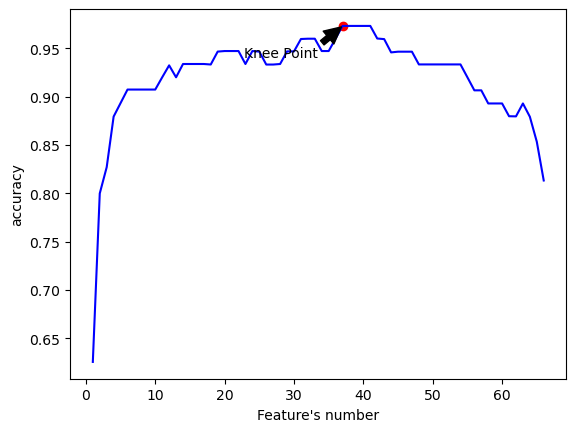

In [33]:
plt.plot(featurNumber_accur["featureNumber"],featurNumber_accur["accur"],  color='blue')
plt.scatter(len(knee_point['features']), knee_point['accur'],  color='red')
# plt.annotate('Knee Point', (len(knee_point['features']), knee_point['accur']), xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None)
plt.annotate('Knee Point',  (len(knee_point['features']), knee_point['accur']),
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
plt.xlabel("Feature's number")
plt.ylabel("accuracy")
plt.show()

In [34]:
print(f"""Optimum Features Count : {len(knee_point['features'])} 
Features : {knee_point['features']} 
Test Accuracy : {knee_point['accur']} 
      """)

Optimum Features Count : 37 
Features : ['mfcc4_var', 'mfcc4_mean', 'mfcc3_mean', 'mfcc12_mean', 'mfcc3_var', 'mfcc5_var', 'mfcc16_var', 'harmonic_mean', 'mfcc7_var', 'mfcc15_var', 'poly_features_var', 'rms_var', 'mfcc13_mean', 'mfcc19_var', 'poly_features_mean', 'spectral_flatness__var', 'mfcc10_mean', 'spectral_bandwidth_var', 'zero_crossing_rate_var', 'mfcc14_var', 'mfcc8_mean', 'mfcc1_var', 'spectral_centroid_var', 'rms_mean', 'mfcc6_mean', 'mfcc17_var', 'tonnetz_mean', 'chroma_cens_mean', 'mfcc18_var', 'mfcc6_var', 'mfcc20_var', 'tempogram_var', 'chroma_cens_var', 'mfcc14_mean', 'percussive_mean', 'mfcc20_mean', 'mfcc10_var'] 
Test Accuracy : 0.9733333333333334 
      


### Backward elimination 

### Optimum Backward Elimination for SVM

In [35]:
dff=df.loc[:, ~df.columns.isin(['target', 'song'])]
y=df.target
tmp=[]
featurNumber_accur={"featureNumber":[],"accur":[]}
knee_point={"features":[],"accur":0}
clf=svm.SVC(kernel='linear')


while( len_dff := len(dff.columns.values))>1:
    for col_name in dff:
        #       print(col_name,for_sel_colname,col_name not in for_sel_colname)
        data=dff.loc[:, dff.columns != col_name] #Exclude col_name column
#         print(len(data.columns.values))
        if(len(data.columns.values)>0):
            norm = preprocessing.StandardScaler().fit(data).transform(data.astype(float))
            X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2, random_state=4)
            clf.fit(X_train, y_train)
            yhat = clf.predict(X_test)
            accur=metrics.f1_score(y_test, yhat, average='weighted')
    #         print(accur)
            tmp.append([col_name,accur])
    #         print(tmp)
    max_tmp=max(tmp, key=lambda x: x[1])    
    featurNumber_accur["featureNumber"].append(len_dff)
    featurNumber_accur["accur"].append(max_tmp[1])
    
    if max_tmp[1] >= knee_point["accur"] :
#         print('max_tmp[1]',max_tmp[1],'knee_point["accur"]',knee_point["accur"],len(dff.columns.values))
        check_first_loop = False
        knee_point["accur"]=max_tmp[1]
        knee_point["features"]=dff.columns.values
    dff=dff.drop(columns=(max_tmp[0]))


    tmp=[]

print("done")

done


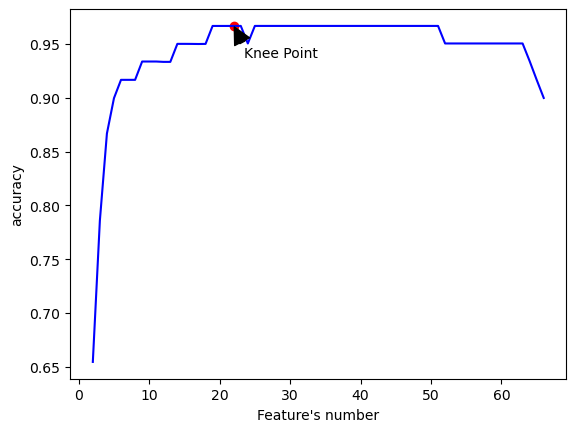

In [36]:
plt.plot(featurNumber_accur["featureNumber"],featurNumber_accur["accur"],  color='blue')
plt.scatter(len(knee_point['features']), knee_point['accur'],  color='red')
plt.annotate('Knee Point',  (len(knee_point['features']), knee_point['accur']),
            xytext=(0.5, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10,
            horizontalalignment='right', verticalalignment='top')
plt.xlabel("Feature's number")
plt.ylabel("accuracy")
plt.show()

In [37]:
print(f"""Optimum Features Count : {len(knee_point['features'])} 
Features : {knee_point['features']} 
Test Accuracy : {knee_point['accur']} 
      """)

Optimum Features Count : 22 
Features : ['chroma_stft_mean' 'mfcc5_mean' 'mfcc5_var' 'mfcc6_mean' 'mfcc7_mean'
 'mfcc8_var' 'mfcc9_mean' 'mfcc9_var' 'mfcc11_mean' 'mfcc13_mean'
 'mfcc14_mean' 'mfcc14_var' 'mfcc15_mean' 'mfcc15_var' 'mfcc16_mean'
 'mfcc17_mean' 'mfcc18_mean' 'mfcc18_var' 'mfcc19_mean' 'mfcc19_var'
 'mfcc20_mean' 'mfcc20_var'] 
Test Accuracy : 0.9666666666666667 
      


### Choosing Model 
{'features': ['spectral_contrast_var',
  'chroma_stft_var',
  'mfcc8_var',
  'mfcc5_var',
  'mfcc11_mean',
  'tonnetz_var',
  'spectral_centroid_var',
  'spectral_bandwidth_var',
  'spectral_flatness__var',
  'spectral_rolloff__var',
  'mfcc8_mean'],
 'accur': 0.9603026004728134}


In [39]:
def predict_genre(audio_path):
    sdf=df.loc[:, ~df.columns.isin(['tempogram_mean','tempogram_var','harmonic_var'])]
    selected_col=['spectral_contrast_var', 'chroma_stft_var', 'mfcc8_var', 'mfcc5_var', 'mfcc11_mean', 'tonnetz_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'spectral_flatness__var', 'spectral_rolloff__var', 'mfcc8_mean']
    sdf=sdf[selected_col]
    y=df.target
    norm = preprocessing.StandardScaler().fit(sdf).transform(data.astype(float))
    X_train, X_test, y_train, y_test = train_test_split( norm, y, test_size=0.2,random_state=4)
    k = 10
    #Train Model and Predict  
    kneigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
    
    audio_path = '/home/arman/Documents/Goalearn/1_music_classification/archive/Data/genres_original/blues/blues.00000.wav'
    
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=x, n_mfcc=20, sr=sample_rate)
    
    data={
                'spectral_centroid_var':np.var(librosa.feature.spectral_centroid(y=x, sr=sr)),
                'spectral_bandwidth_var':np.var(librosa.feature.spectral_bandwidth(y=x, sr=sr)),
                'spectral_contrast_var':np.var(librosa.feature.spectral_contrast(y=x, sr=sr)),
                'spectral_flatness__var':np.var(librosa.feature.spectral_flatness(y=x)),
                'spectral_rolloff__var':np.var(librosa.feature.spectral_rolloff(y=x, sr=sr)),
                'tonnetz_var':np.var(librosa.feature.tonnetz(y=x, sr=sr)),
                'chroma_stft_var':np.var(librosa.feature.chroma_stft(y=x, sr=sr)),
    }
            
    for i,mf in enumerate(mfccs):
        if(i==7 or i==4 or i==10):
            data[f'mfcc{i+1}_mean']=np.mean(mf)
            data[f'mfcc{i+1}_var']=np.var(mf)
            
            
    
    column_names=list(data.keys())
    for (new_key, new_value) in my_dict.items():   
        if new_key in selected_col== 0:
            data[new_key] = new_value
    arr=list(data.values())
    kneigh.predict(np.array(arr))
        
        
        
        

/home/arman/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- chroma_stft_var
- mfcc11_mean
- mfcc8_mean
- mfcc8_var
- spectral_bandwidth_var
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but StandardScaler is expecting 11 features as input.